# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = False # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 992/30000 [00:12<04:40, 103.29it/s]

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.848718
INFO:tensorflow:88.749 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.10
INFO:tensorflow:		 predicted_dist = 20.2 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 20.0 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.60
INFO:tensorflow:		 predicted_dist = 20.5 (2.1)
INFO:tensorflow:	 eval_time = 4.59


  7%|▋         | 1996/30000 [00:26<04:35, 101.77it/s] 

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 1.964902
INFO:tensorflow:115.743 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -19.00
INFO:tensorflow:		 predicted_dist = 23.5 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 23.8 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 24.6 (2.2)
INFO:tensorflow:	 eval_time = 3.56


 10%|▉         | 2995/30000 [00:39<04:25, 101.76it/s]

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.519800
INFO:tensorflow:119.312 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -21.50
INFO:tensorflow:		 predicted_dist = 25.8 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.60
INFO:tensorflow:		 predicted_dist = 27.1 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.80
INFO:tensorflow:		 predicted_dist = 27.2 (0.7)
INFO:tensorflow:	 eval_time = 3.26


 13%|█▎        | 3992/30000 [00:53<04:06, 105.57it/s]

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 0.972784
INFO:tensorflow:113.436 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.20
INFO:tensorflow:		 predicted_dist = 24.1 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.40
INFO:tensorflow:		 predicted_dist = 25.1 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 26.7 (2.4)
INFO:tensorflow:	 eval_time = 3.51


 17%|█▋        | 4997/30000 [01:06<04:13, 98.83it/s] 

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 0.800888
INFO:tensorflow:112.785 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.70
INFO:tensorflow:		 predicted_dist = 26.8 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.50
INFO:tensorflow:		 predicted_dist = 27.6 (0.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 28.0 (0.7)
INFO:tensorflow:	 eval_time = 3.61


 20%|█▉        | 5997/30000 [01:20<03:57, 101.04it/s]

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 0.718816
INFO:tensorflow:114.218 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.70
INFO:tensorflow:		 predicted_dist = 25.4 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 25.9 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -29.10
INFO:tensorflow:		 predicted_dist = 28.2 (0.8)
INFO:tensorflow:	 eval_time = 3.70


 23%|██▎       | 6991/30000 [01:34<03:46, 101.51it/s]

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 1.103216
INFO:tensorflow:111.482 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.30
INFO:tensorflow:		 predicted_dist = 23.7 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.90
INFO:tensorflow:		 predicted_dist = 24.7 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 26.4 (1.1)
INFO:tensorflow:	 eval_time = 3.44


 27%|██▋       | 7992/30000 [01:47<03:43, 98.58it/s] 

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 1.299257
INFO:tensorflow:114.112 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.30
INFO:tensorflow:		 predicted_dist = 26.2 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.70
INFO:tensorflow:		 predicted_dist = 27.2 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.10
INFO:tensorflow:		 predicted_dist = 27.6 (0.4)
INFO:tensorflow:	 eval_time = 3.38


 30%|██▉       | 8994/30000 [02:00<03:23, 103.22it/s]

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 1.618266
INFO:tensorflow:119.141 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -22.40
INFO:tensorflow:		 predicted_dist = 23.9 (3.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.40
INFO:tensorflow:		 predicted_dist = 22.7 (3.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.40
INFO:tensorflow:		 predicted_dist = 27.4 (0.9)
INFO:tensorflow:	 eval_time = 3.29


 33%|███▎      | 9996/30000 [02:14<03:07, 106.89it/s]

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 1.489163
INFO:tensorflow:113.078 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.10
INFO:tensorflow:		 predicted_dist = 22.1 (2.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.80
INFO:tensorflow:		 predicted_dist = 25.0 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.50
INFO:tensorflow:		 predicted_dist = 26.4 (1.2)
INFO:tensorflow:	 eval_time = 3.77


 37%|███▋      | 10995/30000 [02:28<03:33, 89.15it/s] 

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 1.618934
INFO:tensorflow:108.873 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.50
INFO:tensorflow:		 predicted_dist = 18.3 (6.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -21.20
INFO:tensorflow:		 predicted_dist = 24.4 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.40
INFO:tensorflow:		 predicted_dist = 26.4 (0.8)
INFO:tensorflow:	 eval_time = 3.28


 40%|███▉      | 11993/30000 [02:43<04:06, 72.99it/s]

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 2.070292
INFO:tensorflow:95.951 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -21.40
INFO:tensorflow:		 predicted_dist = 21.9 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.80
INFO:tensorflow:		 predicted_dist = 23.6 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -25.40
INFO:tensorflow:		 predicted_dist = 25.3 (0.7)
INFO:tensorflow:	 eval_time = 3.43


 43%|████▎     | 12991/30000 [02:58<03:10, 89.26it/s]

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 3.076257
INFO:tensorflow:98.013 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.60
INFO:tensorflow:		 predicted_dist = 22.2 (4.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.80
INFO:tensorflow:		 predicted_dist = 23.0 (3.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -25.60
INFO:tensorflow:		 predicted_dist = 25.2 (1.4)
INFO:tensorflow:	 eval_time = 3.58


 47%|████▋     | 13997/30000 [03:13<02:58, 89.49it/s] 

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.294886
INFO:tensorflow:105.073 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.60
INFO:tensorflow:		 predicted_dist = 20.0 (3.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.00
INFO:tensorflow:		 predicted_dist = 21.8 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -22.70
INFO:tensorflow:		 predicted_dist = 24.5 (2.4)
INFO:tensorflow:	 eval_time = 2.79


 50%|████▉     | 14998/30000 [03:27<02:49, 88.36it/s] 

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.867991
INFO:tensorflow:100.726 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.5 (3.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -22.80
INFO:tensorflow:		 predicted_dist = 21.4 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.00
INFO:tensorflow:		 predicted_dist = 23.3 (1.5)
INFO:tensorflow:	 eval_time = 3.80


 53%|█████▎    | 15995/30000 [03:42<02:31, 92.55it/s]

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.777847
INFO:tensorflow:96.570 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.80
INFO:tensorflow:		 predicted_dist = 16.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -25.80
INFO:tensorflow:		 predicted_dist = 19.4 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.40
INFO:tensorflow:		 predicted_dist = 21.8 (1.4)
INFO:tensorflow:	 eval_time = 3.73


 57%|█████▋    | 16991/30000 [03:57<02:27, 88.46it/s]

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 3.017490
INFO:tensorflow:98.325 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -8.40
INFO:tensorflow:		 predicted_dist = 16.3 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.20
INFO:tensorflow:		 predicted_dist = 18.7 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -21.20
INFO:tensorflow:		 predicted_dist = 22.0 (0.8)
INFO:tensorflow:	 eval_time = 3.08


 60%|█████▉    | 17996/30000 [04:13<02:19, 85.93it/s]

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.952288
INFO:tensorflow:93.697 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.50
INFO:tensorflow:		 predicted_dist = 14.4 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -19.10
INFO:tensorflow:		 predicted_dist = 18.2 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -24.40
INFO:tensorflow:		 predicted_dist = 22.0 (0.9)
INFO:tensorflow:	 eval_time = 3.53


 63%|██████▎   | 18993/30000 [04:28<02:22, 77.01it/s]

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 2.880339
INFO:tensorflow:95.339 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.10
INFO:tensorflow:		 predicted_dist = 12.7 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.40
INFO:tensorflow:		 predicted_dist = 14.8 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.80
INFO:tensorflow:		 predicted_dist = 19.7 (1.8)
INFO:tensorflow:	 eval_time = 3.62


 67%|██████▋   | 19995/30000 [04:44<01:58, 84.26it/s]

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.045287
INFO:tensorflow:90.487 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -7.10
INFO:tensorflow:		 predicted_dist = 11.5 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.00
INFO:tensorflow:		 predicted_dist = 15.7 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -23.90
INFO:tensorflow:		 predicted_dist = 16.8 (1.0)
INFO:tensorflow:	 eval_time = 3.06


 70%|██████▉   | 20998/30000 [04:59<01:40, 89.77it/s] 

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.077719
INFO:tensorflow:98.645 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.00
INFO:tensorflow:		 predicted_dist = 11.1 (3.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 14.3 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 17.2 (1.3)
INFO:tensorflow:	 eval_time = 2.62


 73%|███████▎  | 21993/30000 [05:13<01:29, 89.35it/s] 

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.282001
INFO:tensorflow:96.404 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 10.8 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.80
INFO:tensorflow:		 predicted_dist = 14.2 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 16.8 (0.6)
INFO:tensorflow:	 eval_time = 2.59


 77%|███████▋  | 22994/30000 [05:28<01:21, 86.16it/s]

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 2.892014
INFO:tensorflow:94.738 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 10.1 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.20
INFO:tensorflow:		 predicted_dist = 12.6 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 15.6 (0.9)
INFO:tensorflow:	 eval_time = 2.35


 80%|███████▉  | 23997/30000 [05:43<01:12, 82.54it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.375310
INFO:tensorflow:90.726 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.30
INFO:tensorflow:		 predicted_dist = 10.9 (2.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 12.4 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.70
INFO:tensorflow:		 predicted_dist = 16.1 (1.7)
INFO:tensorflow:	 eval_time = 2.49


 83%|████████▎ | 24997/30000 [05:58<00:54, 91.84it/s]

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.401998
INFO:tensorflow:91.592 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.50
INFO:tensorflow:		 predicted_dist = 8.4 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.60
INFO:tensorflow:		 predicted_dist = 12.0 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 16.0 (1.2)
INFO:tensorflow:	 eval_time = 2.40


 87%|████████▋ | 25997/30000 [06:12<00:43, 91.19it/s]

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.738292
INFO:tensorflow:98.446 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.60
INFO:tensorflow:		 predicted_dist = 9.2 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 12.5 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.00
INFO:tensorflow:		 predicted_dist = 15.1 (1.4)
INFO:tensorflow:	 eval_time = 2.59


 90%|████████▉ | 26994/30000 [06:26<00:33, 88.60it/s]

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.676348
INFO:tensorflow:95.942 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 7.7 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 12.9 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 15.5 (1.7)
INFO:tensorflow:	 eval_time = 2.70


 93%|█████████▎| 27993/30000 [06:41<00:23, 83.76it/s]

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.115084
INFO:tensorflow:95.164 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 7.5 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.80
INFO:tensorflow:		 predicted_dist = 11.6 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 13.9 (1.3)
INFO:tensorflow:	 eval_time = 2.43


 97%|█████████▋| 28996/30000 [06:55<00:13, 73.99it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.531389
INFO:tensorflow:92.638 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 8.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 10.8 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 13.5 (1.2)
INFO:tensorflow:	 eval_time = 2.45


100%|█████████▉| 29998/30000 [07:10<00:00, 89.60it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/fourrooms/FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.122831
INFO:tensorflow:97.153 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 5.2 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 11.3 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.20
INFO:tensorflow:		 predicted_dist = 13.7 (1.1)
INFO:tensorflow:	 eval_time = 2.07


100%|██████████| 30000/30000 [07:12<00:00, 69.37it/s]


LossInfo(loss=<tf.Tensor: id=1149426, shape=(), dtype=float32, numpy=3.1228306>, extra=(<tf.Tensor: id=1149427, shape=(), dtype=float32, numpy=0.62851244>, <tf.Tensor: id=1149428, shape=(), dtype=float32, numpy=2.4943182>))

# Load trained model into agent

In [11]:
filename = "FourRooms_coordinate_30steps-May-19-2021-12-05-16-AM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

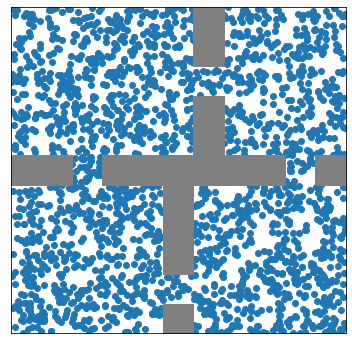

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

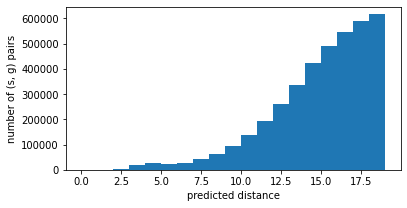

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 244 nodes and 871 edges


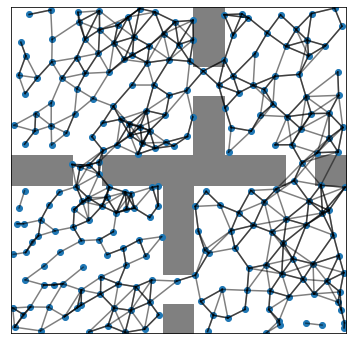

In [16]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 244 nodes and 825 edges


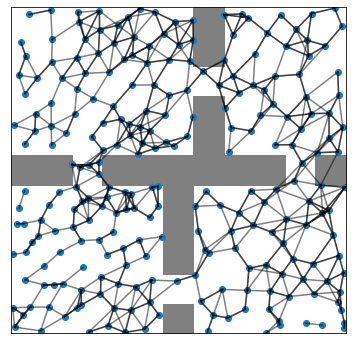

In [17]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 244 nodes and 748 edges


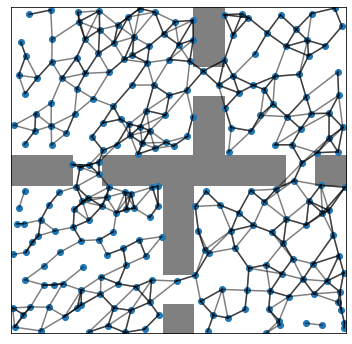

In [18]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 244 nodes and 626 edges


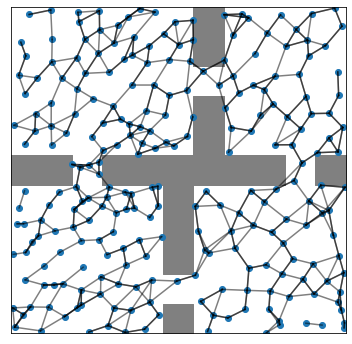

In [19]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 244 nodes and 454 edges


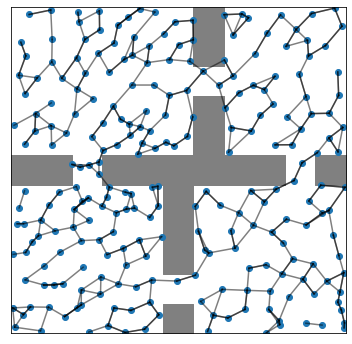

In [20]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 244 nodes and 239 edges


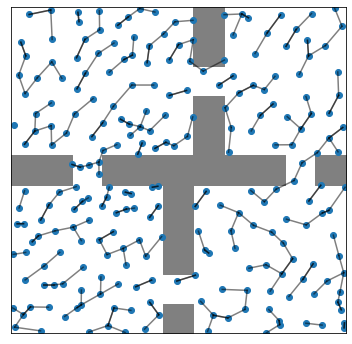

In [21]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

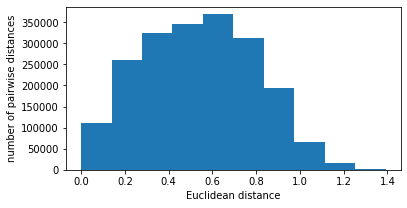

In [22]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [23]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [ ]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.35
Evaluated initial SGM success rate in 553.07 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.15
Took 5000 cleanup steps and evaluated SGM success rate in 1088.14 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.25
Took 5000 cleanup steps and evaluated SGM success rate in 1104.91 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.40
Took 5000 cleanup steps and evaluated SGM success rate in 1126.37 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.50
Took 5000 cleanup steps and evaluated SGM success rate in 1058.16 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.55
Took 5000 cleanup steps and evaluated SGM success rate in 1010.32 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.50
Took 5000 cleanup steps and evaluated SGM success rate in 1069.84 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.50
Took 

# Load cleanup graphs

In [ ]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

In [ ]:
plot_points(search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)